<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### EXPLORATION OF DATA

In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [9]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [10]:
boston_df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

### DATA VISUALISATION

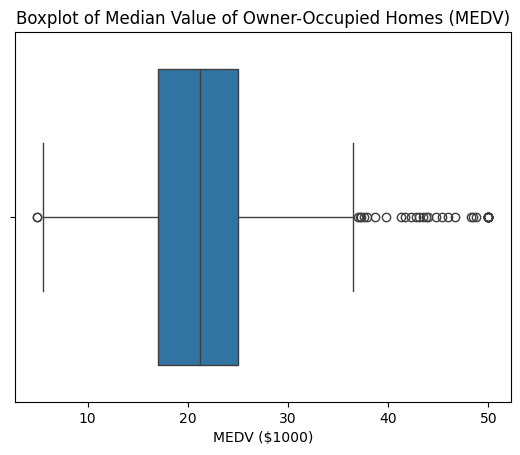

In [12]:
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('MEDV ($1000)')
plt.show()

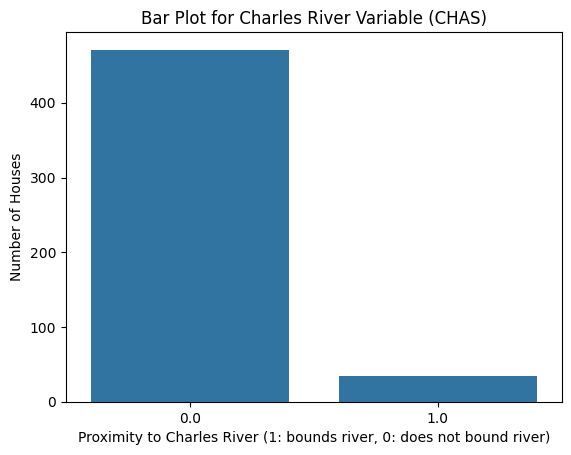

In [13]:
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot for Charles River Variable (CHAS)')
plt.xlabel('Proximity to Charles River (1: bounds river, 0: does not bound river)')
plt.ylabel('Number of Houses')
plt.show()

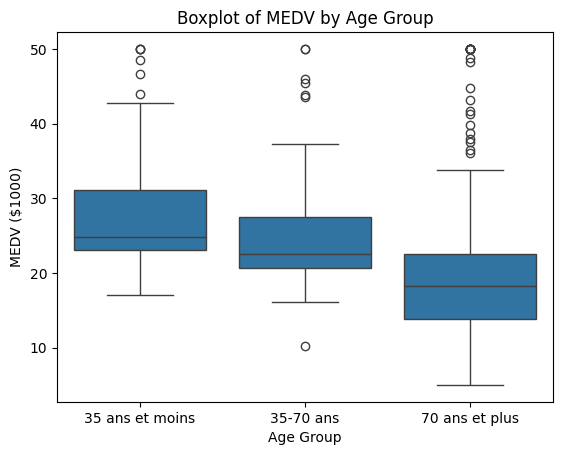

In [14]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 ans et moins', '35-70 ans', '70 ans et plus'])

# Boxplot pour MEDV par rapport à AGE_GROUP
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('MEDV ($1000)')
plt.show()

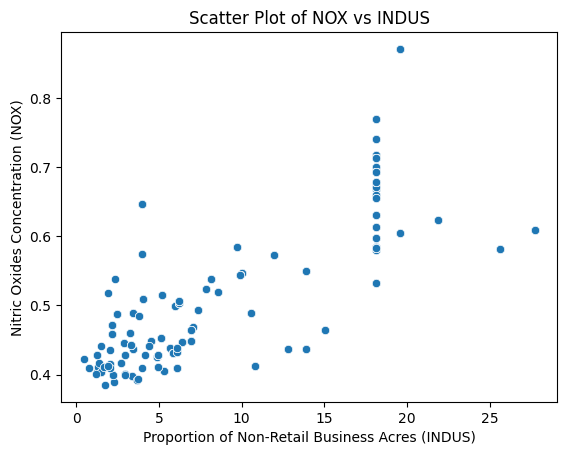

In [15]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxides Concentration (NOX)')
plt.show()

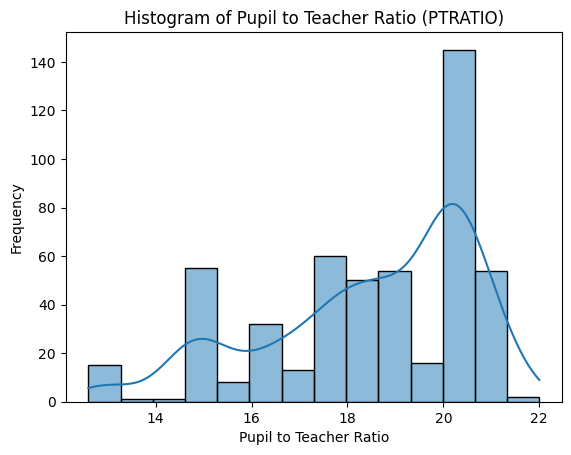

In [16]:
sns.histplot(boston_df['PTRATIO'], kde=True)
plt.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

### TEST HYPOTHESIS

In [17]:
from scipy.stats import ttest_ind

# Diviser les données en deux groupes en fonction de la variable CHAS
medv_near_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_not_near_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Effectuer un t-test pour échantillons indépendants
t_stat, p_value = ttest_ind(medv_near_river, medv_not_near_river)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


we reject the null hypothesis and conclude that there is a significant difference in median home values ​​based on their proximity to the Charles River.

In [19]:
from scipy.stats import f_oneway
# Créer les groupes d'âge
age_group1 = boston_df[boston_df['AGE_GROUP'] == '35 ans et moins']['MEDV']
age_group2 = boston_df[boston_df['AGE_GROUP'] == '35-70 ans']['MEDV']
age_group3 = boston_df[boston_df['AGE_GROUP'] == '70 ans et plus']['MEDV']

# Effectuer l'ANOVA
f_stat, p_value = f_oneway(age_group1, age_group2, age_group3)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


we reject the null hypothesis and conclude that there is a significant difference in median home values ​​based on their proximity to the Charles River.

In [20]:
from scipy.stats import pearsonr

# Calculer la corrélation de Pearson
corr_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson correlation coefficient: {corr_coefficient}, P-value: {p_value}")

Pearson correlation coefficient: 0.7636514469209192, P-value: 7.913361061210442e-98


that there is a significant linear relationship between NOXand INDUS

In [22]:
import statsmodels.api as sm

# Définir les variables indépendantes et dépendantes
X = boston_df['DIS']
y = boston_df['MEDV']

# Ajouter une constante (pour l'interception)
X = sm.add_constant(X)

# Effectuer la régression linéaire
model = sm.OLS(y, X).fit()

# Résultats de la régression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        13:55:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0